In [2]:
from pymatgen.electronic_structure.dos import CompleteDos
from pymatgen.electronic_structure.plotter import DosPlotter
from pymatgen.electronic_structure.core import Spin, Orbital
from pymatgen.io.vasp.outputs import Vasprun, Procar
from pymatgen.core.ion import Ion

In [3]:
vasprun = Vasprun("./2.1-DOS/vasprun.xml")
vasprun_U = Vasprun("./supercell/vasprun.xml")

/usr/local/lib/python3.10/dist-packages/pymatgen/io/vasp/outputs.py:1062: UserWarning: No POTCAR file with matching TITEL fields was found in /home/egg/uni/Thesis/code/TiO2/analysis/2.1-DOS
  warnings.warn(f"No POTCAR file with matching TITEL fields was found in {os.path.abspath(p)}")
/usr/local/lib/python3.10/dist-packages/pymatgen/io/vasp/outputs.py:1062: UserWarning: No POTCAR file with matching TITEL fields was found in /home/egg/uni/Thesis/code/TiO2/analysis/supercell
  warnings.warn(f"No POTCAR file with matching TITEL fields was found in {os.path.abspath(p)}")


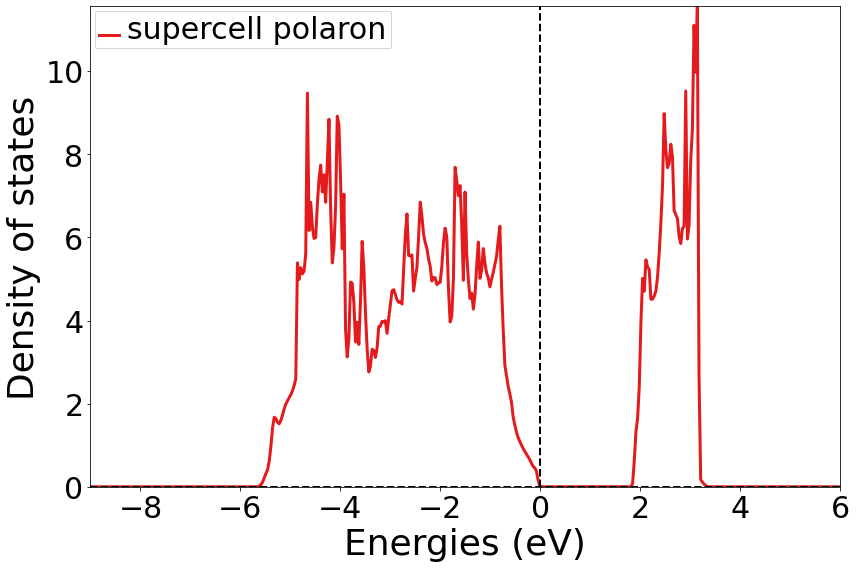

In [6]:
tdos = vasprun.tdos
#tdos_U = vasprun_U.tdos

plot = DosPlotter(zero_at_efermi=True)
plot.add_dos('supercell polaron', tdos)
#plot.add_dos('supercell no polaron', tdos_U)
plot.show(xlim=(-9,6))

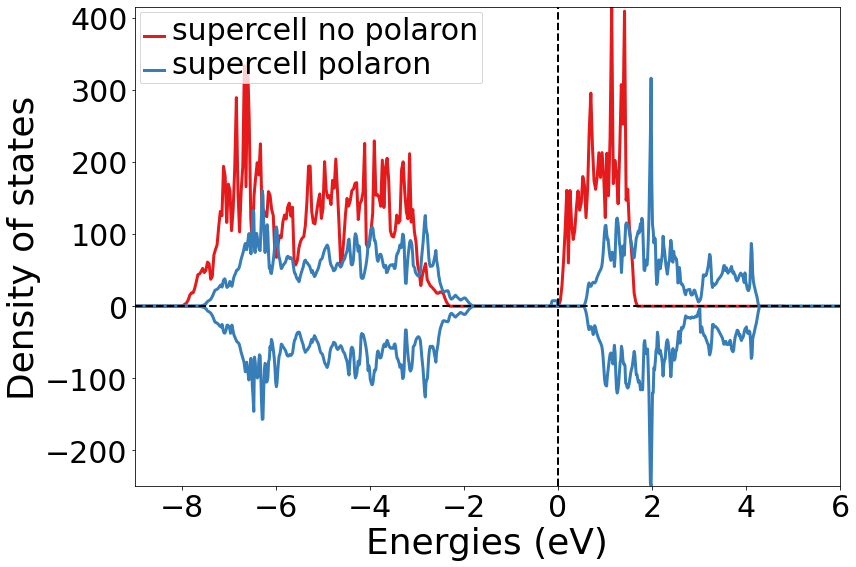

In [38]:
plot.save_plot('dos_supercell.pdf', img_format='pdf', xlim=(-9,6))

In [7]:
from pymatgen.io.vasp import Vasprun, BSVasprun
from pymatgen.electronic_structure.plotter import BSPlotter

v = BSVasprun("2.2-badstructure/vasprun.xml")
bs = v.get_band_structure(kpoints_filename="output_Ti39_sv/KPOINTS",line_mode=True)

FileNotFoundError: [Errno 2] No such file or directory: '2.2-badstructure/vasprun.xml'

In [41]:
from pymatgen.electronic_structure.plotter import BSPlotter, BSPlotterProjected

bs.get_projection_on_elements()

#plt = BSPlotterProjected(bs)
#plt.get_plot(vbm_cbm_marker=True)

{}

In [41]:
plt.save_plot('bands_supercell.pdf', img_format='pdf')

In [29]:
from pymatgen.electronic_structure.plotter import BSDOSPlotter

In [80]:
from pymatgen.electronic_structure.dos import CompleteDos
from pymatgen.electronic_structure.plotter import DosPlotter
from pymatgen.electronic_structure.core import Spin, Orbital
from pymatgen.io.vasp.outputs import Vasprun, Procar
from pymatgen.core.ion import Ion

vasprun = Vasprun("./polaron/dos/vasprun.xml")

pdos = vasprun.pdos
tdos = vasprun.tdos
efermi = vasprun.efermi
energy = vasprun.eigenvalues
structure = vasprun.structures




data = vasprun.complete_dos.get_site_t2g_eg_resolved_dos(vasprun.structures[0][0])
plot = DosPlotter()
plot.add_dos("t2g",data['t2g'])

plot.show()


/usr/local/lib/python3.10/dist-packages/pymatgen/io/vasp/outputs.py:1062: UserWarning: No POTCAR file with matching TITEL fields was found in /home/egg/uni/Thesis/code/TiO2/analysis/polaron/dos
  warnings.warn(f"No POTCAR file with matching TITEL fields was found in {os.path.abspath(p)}")


TypeError: reduce() of empty iterable with no initial value

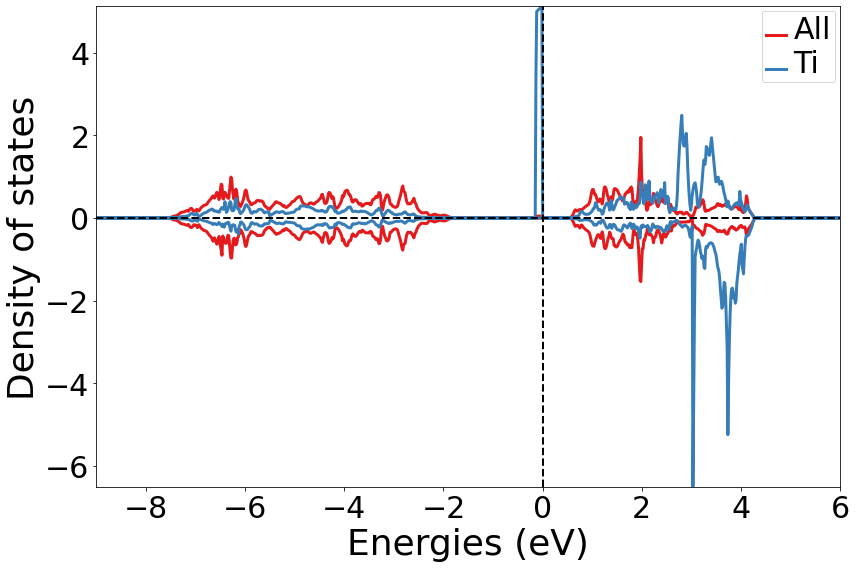

In [81]:
from pymatgen.core.periodic_table import Element

structure = vasprun.structures
site = structure[0][0]

Ti_dos = vasprun.complete_dos.get_site_dos(site)
tdos.densities = {k: v / (27*6) for k, v in tdos.densities.items()}

plot = DosPlotter()
plot.add_dos("Ti", Ti_dos)
plot.add_dos("All", tdos)
plot.show(xlim=(-9,6))

PeriodicSite: Ti (6.8760, 6.8760, 4.4295) [0.5000, 0.5000, 0.5000]